# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: DAYO EHINMORO

<br>

## Please show and display ALL your calculations and results.


In [1]:
import pandas as pd
import operator
import re
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords

import collections
from collections import OrderedDict
from collections import Counter

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [2]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
# %load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

In [3]:
data = pd.read_csv("/content/Ulta Skincare Reviews.csv")
data.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [5]:
data.shape

(4150, 10)

In [6]:
# Check for null values in the entire DataFrame
print(data.isnull().sum())




Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64


In [7]:
# Check for unique values in a specific column
unique_values_in_Review_Text = data['Review_Text'].unique()
unique_values_in_Review_Text

array(['Love using this on my face while in the shower. Heats up and gives a light scrub nicely',
       "Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother",
       'Enjoy this product so much ! I look forward to using it - really feels great.',
       ..., 'My skin looks better now than 10 years ago.',
       "This product was useless for me. I should've known an exfoliant I can use daily would be too gentle for me. I didn't see any worthy results... It was very costly for the results to be unnoticeable. I gave it to a friend to see if it worked out for her. Haven't asked her about it though.",
       'This product is amazing! It is the only thing that helps the dry patches on my cheeks and it also cleans out your pores! It leaves your skin very soft and smooth!!'],
      dtype=object)

In [9]:
# Check which rows have null values in 'Review_Text' column
null_rows_Review_Text = data['Review_Text'].isnull()


In [10]:
# Print the rows with null values
print(data[null_rows_Review_Text])


                         Review_Title Review_Text Verified_Buyer  Review_Date  \
3684  Received a sample and loved it!         NaN            Yes  4 years ago   
3686               This product works         NaN            Yes  4 years ago   

     Review_Location  Review_Upvotes  Review_Downvotes             Product  \
3684    Columbia, SC               0                 0  Daily Microfoliant   
3686    Columbia, SC               0                 0  Daily Microfoliant   

            Brand Scrape_Date  
3684  Dermalogica     3/27/23  
3686  Dermalogica     3/27/23  


In [11]:
# Check which rows have null values in 'Review_Location' column
null_rows_in_Review_Location = data['Review_Location'].isnull()

In [12]:

# Print the rows with null values
print(data[null_rows_in_Review_Location])

           Review_Title  \
3397  Half full product   

                                                                                                                                                                                                                                                                                                     Review_Text  \
3397  The only reason I'm rating this three stars is because it's already a travel-size item, do they really needs to only fill the bottle up halfway? For how pricey this travel size bottle is, they could at least fill the whole thing up or use a smaller container, because otherwise it seems misleading.   

     Verified_Buyer  Review_Date Review_Location  Review_Upvotes  \
3397             No  2 years ago             NaN               2   

      Review_Downvotes             Product        Brand Scrape_Date  
3397                 0  Daily Microfoliant  Dermalogica     3/27/23  


In [13]:
# Calculate the percentage of null values in 'Review_Text' column
null_count = data['Review_Text'].isnull().sum()
total_count = len(data)
null_percentage = (null_count / total_count) * 100

# Print the percentage of null values
print("Percentage of null values in 'Review_Text' column: {:.2f}%".format(null_percentage))


Percentage of null values in 'Review_Text' column: 0.05%


In [14]:
# Calculate the percentage of null values in 'Review_Location' column
null_count = data['Review_Location'].isnull().sum()
total_count = len(data)
null_percentage = (null_count / total_count) * 100

# Print the percentage of null values
print("Percentage of null values in 'Review_Location' column: {:.2f}%".format(null_percentage))

Percentage of null values in 'Review_Location' column: 0.02%


## Based on the low percentages of missing data in the "Review_Text" and "Review_Location" columns, which are 0.05% and 0.02%, respectively, it seems reasonable to remove the rows with missing values.

## Creating a duplicate of the "data" dataset.

In [15]:
# Creating a copy of the "data" DataFrame
data_copy = data.copy()


Verifying that the duplication process was successful by checking the copied **dataset**

In [16]:
# Checking to make sure that the copy was successful
data_copy.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [17]:
# Using the fillna method to replace the null values with "Unknown"
data_copy.fillna('Unknown', inplace=True)


In [18]:
# Droping rows with null values in 'Review_Location' column
# data_copy.dropna(subset=['Review_Location'], inplace=True)


In [19]:
data_copy.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

## The dataset no longer contains any missing values (Nan values)

In [20]:
data_copy.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [21]:
data_copy.shape

(4150, 10)

**This returns an array of the unique values present in the "Verified_Buyer" column of the "data_copy" dataset**

In [22]:
data_copy['Verified_Buyer'].unique()

array(['No', 'Yes'], dtype=object)

This counts the number of occurrences of each unique value in the "Verified_Buyer" column of the "data_copy" dataset and stores the result in the "unique_values_counts" variable

In [23]:
# Get unique values of 'Review_Text' column along with their counts
unique_values_counts = data_copy['Verified_Buyer'].value_counts()

# Print the unique values and their counts
print(unique_values_counts)

No     2901
Yes    1249
Name: Verified_Buyer, dtype: int64


In [24]:
data_copy.columns

Index(['Review_Title', 'Review_Text', 'Verified_Buyer', 'Review_Date',
       'Review_Location', 'Review_Upvotes', 'Review_Downvotes', 'Product',
       'Brand', 'Scrape_Date'],
      dtype='object')

This code counts the number of occurrences of each unique value in the "Review_Title" column of the "data_copy" dataset

In [25]:
# Get unique values of 'Review_Title' column along with their counts
unique_values_counts = data_copy['Review_Title'].value_counts()

# Print the unique values and their counts
print(unique_values_counts)

Amazing product                    95
Love this mask                     90
It's hydrating                     89
Would absolutely buy this again    89
Buy it!                            89
                                   ..
I was supposed to get               1
Love this cleanser. Leaves my       1
Nice and soothing for winter        1
Go strong!                          1
This is the best!!!                 1
Name: Review_Title, Length: 2828, dtype: int64


In [26]:
# Get unique values of 'Product' column along with their counts
unique_values_counts = data_copy['Product'].value_counts()

# Print the unique values and their counts
print(unique_values_counts)

Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64


In [27]:
# Get unique values of 'Brand' column along with their counts
unique_values_counts = data_copy['Brand'].value_counts()

# Print the unique values and their counts
print(unique_values_counts)

Dermalogica    4150
Name: Brand, dtype: int64


In [28]:
# Get unique values of 'Review_Location' column along with their counts
unique_values_counts = data_copy['Review_Location'].value_counts()

# Print the unique values and their counts
print(unique_values_counts)

Undisclosed             909
Los Angeles             117
Iowa                     93
Orlando, Fl              89
Riverside,Ca             89
                       ... 
Baltimore County, MD      1
Rockville MD              1
Almaty, Kazakhstan        1
Los Fresnos               1
Fayetteville              1
Name: Review_Location, Length: 1424, dtype: int64


## It looks like "Undisclosed" doesn't have much value to us, let's dig deeper

In [46]:
data_copy.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.8347}",0.8347


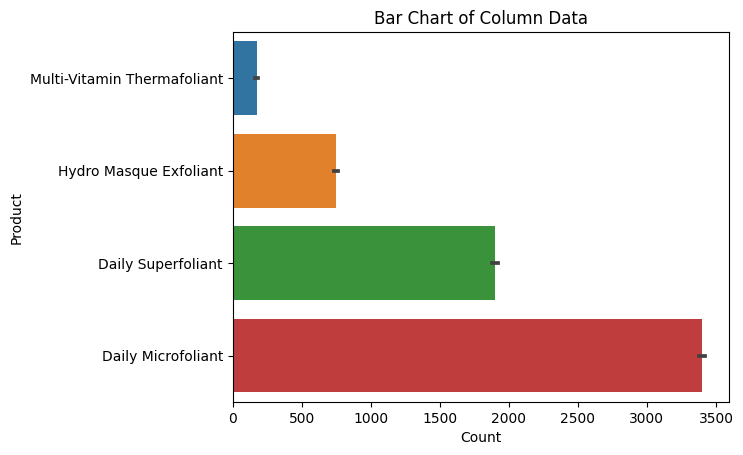

In [47]:
import seaborn as sns

# Assuming you have a dataset 'data' with a column named 'column_name' that you want to plot
# Extract the data from the column
product_data = data['Product']

# Plot a bar chart using Seaborn
sns.barplot(x=product_data.index, y=product_data.values)

# Set the x-axis label
plt.xlabel('Count')

# Set the y-axis label
plt.ylabel('Product')

# Set the title of the chart
plt.title('Bar Chart of Column Data')

# Show the plot
plt.show()

In [48]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vds = SentimentIntensityAnalyzer()

In [50]:
text =  'I am good for today.'

vds.polarity_scores(text)

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [51]:
data_copy['score'] = data_copy['Review_Text'].apply(lambda review: vds.polarity_scores(review))

data_copy.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960


In [52]:
data_copy['compound']  = data_copy['score'].apply(lambda score_dict: score_dict['compound'])

data_copy.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960


In [53]:
data_copy['sentiment'] = data_copy['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

data_copy.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964,pos
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,pos
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.8347}",0.8347,pos


In [54]:
data_copy['Product'].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [55]:
data_copy['Brand'].value_counts()

Dermalogica    4150
Name: Brand, dtype: int64

In [56]:
data_copy["sentiment"].value_counts()

pos    3926
neg     224
Name: sentiment, dtype: int64

In [57]:
data_copy.loc[data_copy["sentiment"] == "neg", "sentiment"] = 0
data_copy.loc[data_copy["sentiment"] == "pos", "sentiment"] = 1

In [58]:
data_copy['sentiment'].value_counts()

1    3926
0     224
Name: sentiment, dtype: int64

In [59]:
data_copy = data_copy.astype({"sentiment": int})

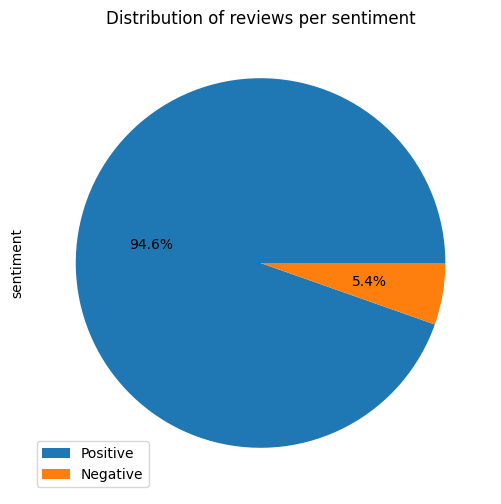

In [62]:
data_copy['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

## Data pre-processing

In [63]:
# Cleaning data_copy
def remove(tweet):
  #remove mention
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'^rt[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'^https[\s]+', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'%', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  tweet = re.sub(r':', '', tweet)
  #remove space
  tweet = tweet.strip()
  #remove double space
  tweet = re.sub('\s+',' ',tweet)
  return tweet
  
data_copy['cleaning_data'] = data_copy['Review_Text'].apply(lambda x: remove(x.lower()))

In [64]:
data_copy.drop_duplicates(subset ="cleaning_data", keep = 'first', inplace = True)

In [65]:
data_copy.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment,cleaning_data
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7964}",0.7964,1,love using this on my face while in the shower. heats up and gives a light scrub nicely
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296}",0.2960,1,even better than the daily microfoliant. i'm obsessed. my skin is so much smoother


In [66]:
data_copy.shape

(3653, 14)

In [67]:
import nltk

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [69]:
## Removing stopwords
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text
  
data_copy['tweet_sw'] = data_copy['cleaning_data'].apply(clean_stopwords)

In [70]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text  
data_copy['tweet_stem'] = data_copy['tweet_sw'].apply(porterstemmer)

##  Lemmatization

In [71]:
## Importing and loading spacy
import spacy
nlp = spacy.load('en_core_web_sm')

In [73]:
def lemmatization (text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
data_copy['tweet_clean'] = data_copy['tweet_stem'].apply(lemmatization)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(data_copy['tweet_clean'])
vector = vectorizer.transform(data_copy['tweet_clean'])
print(vector)


  (0, 3811)	0.13769194840912682
  (0, 3173)	0.41290598807639545
  (0, 3075)	0.3504833300422451
  (0, 2316)	0.35278166955037893
  (0, 2049)	0.1860887017272084
  (0, 1981)	0.44690274418509585
  (0, 1630)	0.5315288911061257
  (0, 1274)	0.21536497299817586
  (1, 3917)	0.39898743006698156
  (1, 3263)	0.25930582280673004
  (1, 3217)	0.14353038882632507
  (1, 2366)	0.5938266169944086
  (1, 2170)	0.5450958035939177
  (1, 814)	0.321261672540798
  (2, 3811)	0.16100665633596306
  (2, 2810)	0.30499861758631686
  (2, 2707)	0.18246014990727485
  (2, 2029)	0.3091687865956119
  (2, 1564)	0.2941012833504299
  (2, 1417)	0.6215300930209432
  (2, 1324)	0.196781636864581
  (2, 1139)	0.49056846715893226
  (3, 3880)	0.22963689873793366
  (3, 3703)	0.14946571143205561
  (3, 3163)	0.3909321300302453
  :	:
  (3651, 3811)	0.06981784328588819
  (3651, 3785)	0.38578850327347286
  (3651, 2933)	0.3518220182199409
  (3651, 2707)	0.07912079191039231
  (3651, 1916)	0.21030210056149057
  (3651, 1504)	0.2252723708965004


## Splitting the dataset

In [75]:
from sklearn.model_selection import train_test_split
X = data_copy['tweet_clean']
y = data_copy['sentiment']

X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2)

## SMOTING

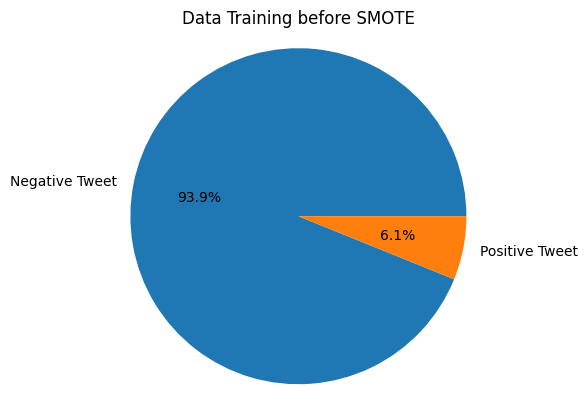

In [76]:
# Class Imbalance Check
plt.pie(y_train.value_counts(), 
        labels=['Negative Tweet','Positive Tweet'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.title("Data Training before SMOTE")
plt.show()

In [78]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

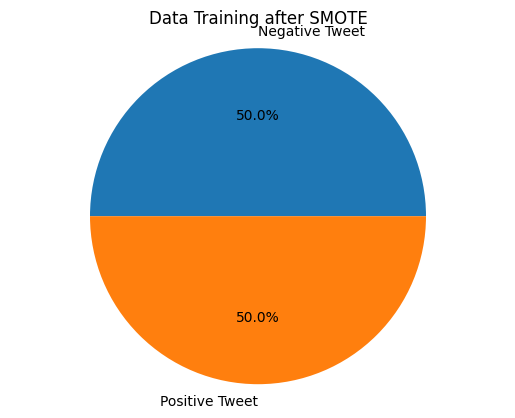

In [79]:
# Class Imbalance Check
plt.pie(y_train_sm.value_counts(), 
        labels=['Negative Tweet','Positive Tweet'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.title("Data Training after SMOTE")
plt.show()

In [80]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_sm))

Original dataset shape Counter({1: 2743, 0: 179})
Resampled dataset shape Counter({1: 2743, 0: 2743})


## Model building

In [81]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [82]:
# create logistic regression model + SMOTE
logreg = LogisticRegression()
# train model on  vectorised training data
model = logreg.fit(X_train_sm, y_train_sm)

In [83]:
# create logistic regression model
logreg1 = LogisticRegression()
# train model on  vectorised training data
model1 = logreg.fit(X_train, y_train)

## Model evaluation

In [85]:
y_preds_training = logreg.fit(X_train_sm, y_train_sm).predict(X_train)
y_preds_testing = logreg.fit(X_train_sm, y_train_sm).predict(X_test)
accuracy_training = accuracy_score(y_train, y_preds_training)
accuracy_testing = accuracy_score(y_test, y_preds_testing)
print('Accuracy: ', accuracy_training*100, "%")
print('Accuracy: ', accuracy_testing*100, "%")
print("Confusion Matrix training : ")
print(confusion_matrix(y_train, y_preds_training))
print("Confusion Matrix testing : ")
print(confusion_matrix(y_test, y_preds_testing))
print("Classification report testing: ")
print(classification_report(y_test, y_preds_testing))
print("Classification report training : ")
print(classification_report(y_train, y_preds_training))

Accuracy:  96.47501711156742 %
Accuracy:  90.69767441860465 %
Confusion Matrix training : 
[[ 176    3]
 [ 100 2643]]
Confusion Matrix testing : 
[[ 22  22]
 [ 46 641]]
Classification report testing: 
              precision    recall  f1-score   support

           0       0.32      0.50      0.39        44
           1       0.97      0.93      0.95       687

    accuracy                           0.91       731
   macro avg       0.65      0.72      0.67       731
weighted avg       0.93      0.91      0.92       731

Classification report training : 
              precision    recall  f1-score   support

           0       0.64      0.98      0.77       179
           1       1.00      0.96      0.98      2743

    accuracy                           0.96      2922
   macro avg       0.82      0.97      0.88      2922
weighted avg       0.98      0.96      0.97      2922



In [ ]:
y_preds_training1 = logreg1.fit(X_train, y_train).predict(X_train)
y_preds_testing1 = logreg1.fit(X_train, y_train).predict(X_test)
accuracy_training1 = accuracy_score(y_train, y_preds_training1)
accuracy_testing1 = accuracy_score(y_test, y_preds_testing1)
print('Accuracy training: ', accuracy_training1*100, "%")
print('Accuracy testing: ', accuracy_testing1*100, "%")
print("Confusion Matrix training : ")
print(confusion_matrix(y_train, y_preds_training1))
print("Confusion Matrix testing : ")
print(confusion_matrix(y_test, y_preds_testing1))
print("Classification report testing: ")
print(classification_report(y_test, y_preds_testing1))
print("Classification report training : ")
print(classification_report(y_train, y_preds_training1))

Accuracy training:  93.94250513347022 %
Accuracy testing:  93.84404924760602 %
Confusion Matrix training : 
[[   3  177]
 [   0 2742]]
Confusion Matrix testing : 
[[  0  43]
 [  2 686]]
Classification report testing: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.94      1.00      0.97       688

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.48       731
weighted avg       0.89      0.94      0.91       731

Classification report training : 
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       180
           1       0.94      1.00      0.97      2742

    accuracy                           0.94      2922
   macro avg       0.97      0.51      0.50      2922
weighted avg       0.94      0.94      0.91      2922



In [86]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.2 MB/s eta 0:00:00


In [87]:
import shap

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [89]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')


In [90]:
vectorizer.fit(data_copy)


TfidfVectorizer(max_features=1000, stop_words='english')

In [91]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
feature_names = vectorizer.vocabulary_


In [92]:
explainer = shap.Explainer(model, X_train_sm, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test)

In [93]:
explainer1 = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values1 = explainer1(X_test)

## The results of sentiment analysis with SHAP interpretation are:
Dermalogica offers numerous benefits to its users, including effective facial cleansing, exfoliation, and smoother skin, which creates a positive perception of the brand's ability to address users' skin concerns.

While Dermalogica products are favored by many users, some have reported an unpleasant scent and formula changes when compared to previous versions of Dermalogica products they used to use.

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?






Answer: 
A popular product is the Dermalogica Multi-Vitamin Thermafoliant, which effectively exfoliates the skin. According to reviewers, the product leaves the skin feeling smoother and cleaner after use, and many of them also appreciated the warming sensation it provides during application.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [94]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

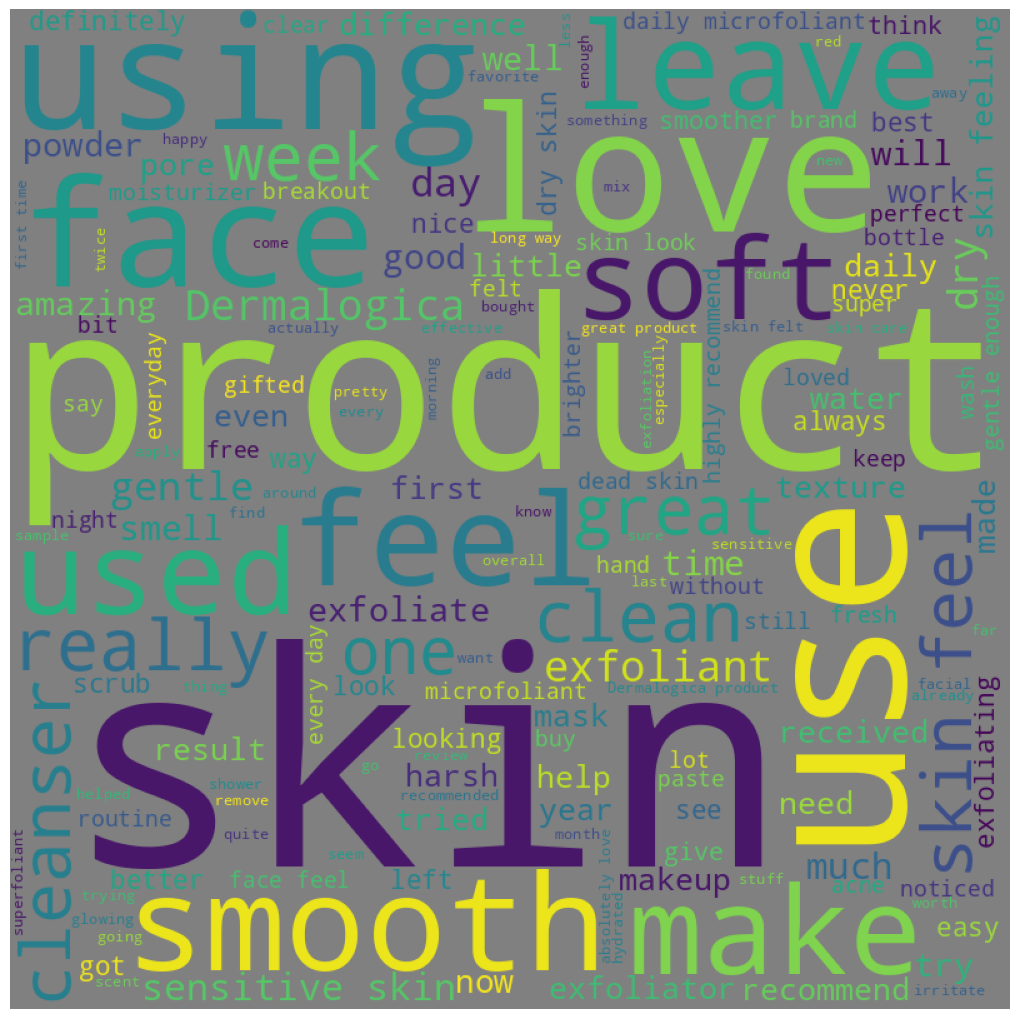

In [102]:
# Concatenate all the reviews into a single string
all_text = ' '.join(data_copy['Review_Text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='grey', min_font_size=10)

# Generate the wordcloud from the text data
wordcloud.generate(all_text)

# Visualize the wordcloud
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

## Performing sentiment analysis

## The result Average polarity: 0.262859074581382 indicates that, on average, the sentiment of the reviews in the dataset is slightly positive, with a polarity score of 0.26.



The average subjectivity score of 0.5457326237656591 for the reviews in the dataset indicates that they tend to express opinions that are moderately subjective. This implies that the reviews are not entirely based on factual information, nor are they entirely based on personal opinions, but rather they reflect a balance between the two..

## Building a machine model that predicts whether a review is positive or negative